PCA

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris.data)

PCA(n_components=2)

In [6]:
X = pca.transform(iris.data)

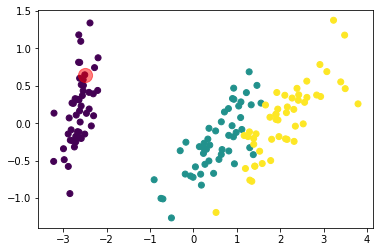

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=iris.target)
plt.scatter([X[10][0]], [X[10][1]], s=[200], c=["r"], alpha=0.5)

SVD

In [8]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(0)
X_dense = np.random.rand(100, 100)
X_dense[:, 2 * np.arange(50)] = 0
X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

[0.01570766 0.05122679 0.04998062 0.04795064 0.04539933]
0.21026503465070323
[35.24105443  4.5981613   4.54200434  4.44866153  4.32887456]


LLE

Computing LLE embedding
Done. Reconstruction error: 1.07368e-07


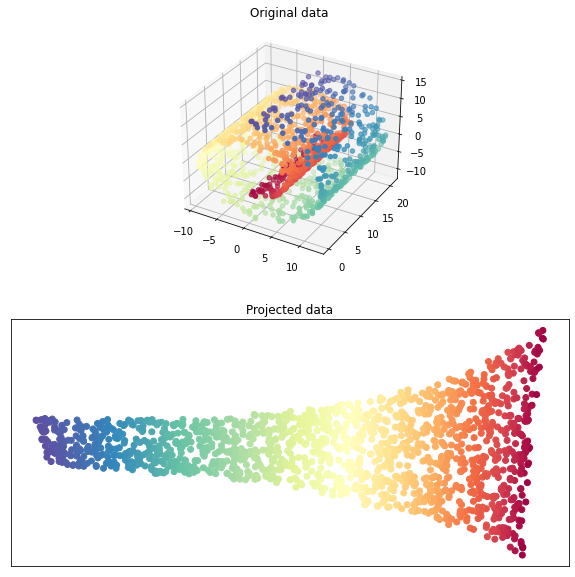

In [9]:
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D

Axes3D

X, color = datasets.make_swiss_roll(n_samples=1500)

print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)
print("Done. Reconstruction error: %g" % err)
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(211, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis("tight")
plt.xticks([]), plt.yticks([])
plt.title("Projected data")
plt.show()

t-SNE

In [10]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [12]:
X_2d = tsne.fit_transform(X)

C:\Users\savio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\savio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


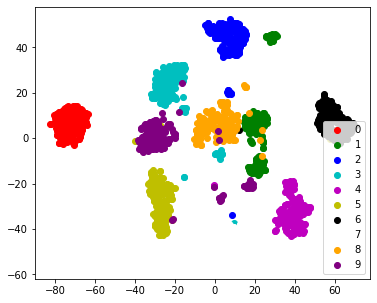

In [13]:
target_ids = range(len(digits.target_names))
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

ISOMAP

In [14]:
X, Y = datasets.make_s_curve(n_samples=1000)

In [15]:
digits = datasets.load_digits(n_class=6)
X_digits, Y_digits  = digits.data, digits. target
print('Dataset Size : ', X_digits.shape, Y_digits.shape)

Dataset Size :  (1083, 64) (1083,)


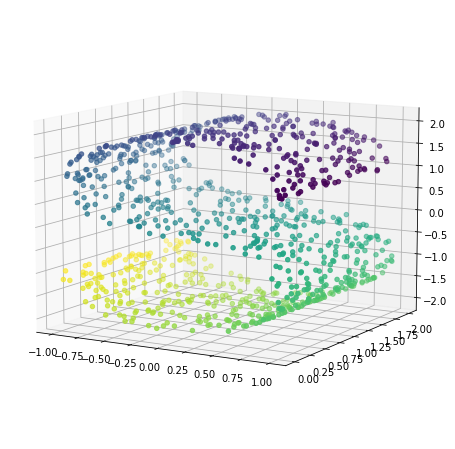

In [16]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=Y)
ax.view_init(10, -60);

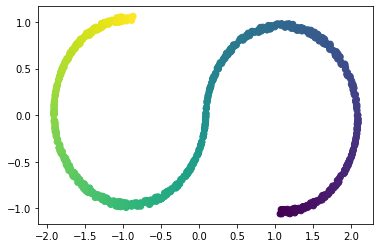

In [17]:
X_pca = PCA(n_components=2).fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y);

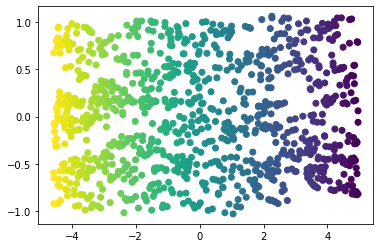

In [18]:
iso = manifold.Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=Y);

In [19]:
isomap = manifold.Isomap(n_neighbors=5, n_components=2)
X_digits_isomap = isomap.fit_transform(X_digits)

C:\Users\savio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\savio\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [20]:
def plot_digits(X, algo=""):
    with plt.style.context(("seaborn", "ggplot")):
        fig = plt.figure(1, figsize=(10, 6))

        colors = ['red','green','orange','blue','purple','cyan','magenta', 'firebrick', 'lawngreen','indigo']
        for digit in range(0,6):
            plt.scatter(X[Y_digits==digit,0],X[Y_digits==digit,1], c = colors[digit], marker="$"+str(digit)+"$",s =50, alpha=0.5)
        plt.xlabel("New Feature 1")
        plt.ylabel("New Feature 2")
        plt.title(algo)
        plt.show()

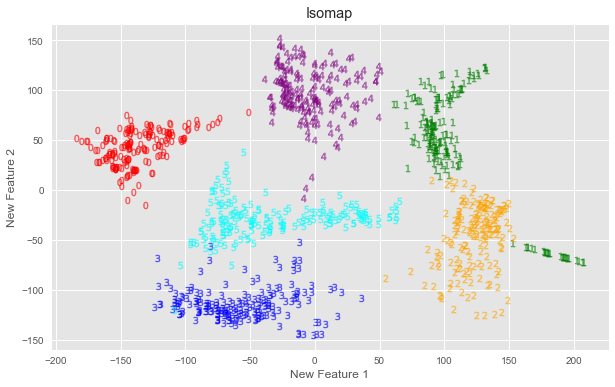

In [21]:
plot_digits(X_digits_isomap, "Isomap")

UMAP

<AxesSubplot:>

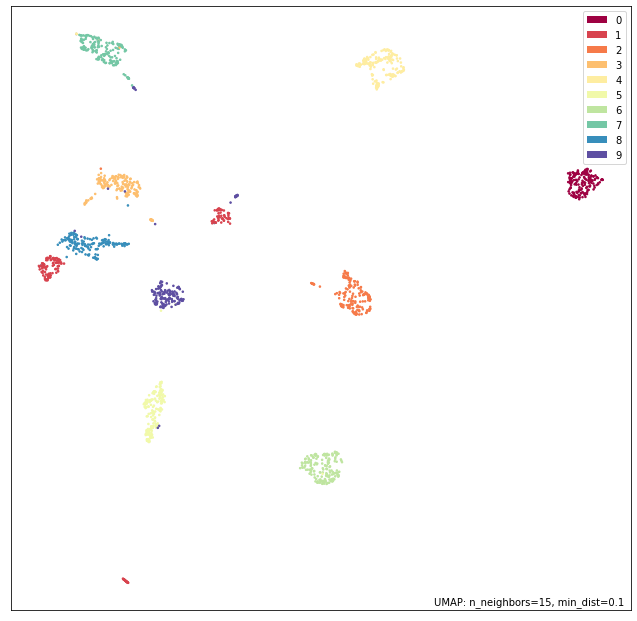

In [22]:
import umap
import umap.plot
digits = datasets.load_digits()
mapper = umap.UMAP().fit(digits.data)
umap.plot.points(mapper, labels=digits.target)